# Convariance Matrix for 2 node graph with feedback loops

A linear SCM with feedback loops is not a DAG, but
it can be "unrolled" into a DAG showing "time-slices" $n=0,1, 2, \ldots$.
Here $n$ is an integer, corresponding to time, that labels the time-slices.
If you remove the arrows connecting the time-slices (SCuMpy draws those arrows in solid green),
you do get a legal DAG for each time-slice. We assume that that "time-slice-DAG" is the same for each 
time-slice.

In my book Bayesuvius, in the chapter entitled 
"LDEN with feedback loops", I derive the solution, in closed form,
for the covariance between any two nodes in each time slice $n$.
That solution is now programmed into SCuMpy. The purpose of this notebook is
to illustrate how to use SCuMpy to calculate that solution, in symbolic form, for you.
We consider in this notebook the simplest possible time-slice-DAG; namely, the two node DAG.
However, SCuMpy can manage an arbitrary time-slice-DAG
with more than 2 nodes, and it can manage all possible arrows between the nodes 
of two adjacent time-slices.

In [1]:
# this makes sure it starts looking for things from the scumpy folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\scumpy


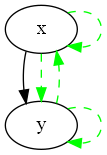

In [2]:
from FBackGraph import *
path = 'dot_atlas/fback-2node.dot'
graph = FBackGraph(path)
# draw linear SCM as single time-slice with feedback loops (green dashed lines)
graph.draw(jupyter=True)

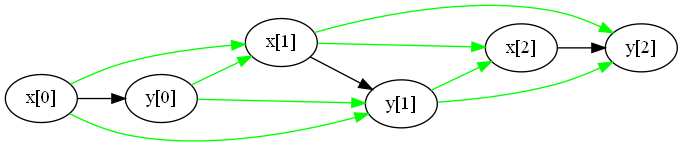

In [3]:
# Unroll linear SCM with feedback loops so as to show 3 time slices connected by green lines.
# Ask for time to point to the right instead of the default behavior, down.
graph.draw(jupyter=True, slices=3, point_right=True)

In my book Bayesuvius, in the chapter entitled 
"LDEN with feedback loops", I show that

$\langle\underline{x}^{[n]},\underline{x}^{[n]T}\rangle=\quad G^n\quad C_0 \quad (G^T)^n$

where

$n=0,,1,2, \dots$ integer corresponding to time

$A$= strictly lower triangular matrix with gain $\alpha_{i|j}$ (gain
for arrow $x^{[n]}_j\rightarrow x^{[n]}_i$) as entries

$B=$ matrix with feedback gains $\beta_{i|j}$ (gain
for arrow $x^{[n]}_j\rightarrow x^{[n+1]}_i$)
as entries

$I_A = 1 - A$

$C_0=\langle\underline{x}^{[0]},\underline{x}^{[0]T}\rangle$ = initial covariance matrix = $I_A^{-1}
diag(\sigma^2_{\underline{\epsilon}_i})
 (I_A^{-1})^T$

G = growth matrix = $I_A^{-1}B$

In [4]:
from FBackCovMatCalculator import *
cal = FBackCovMatCalculator(graph)
cal.calculate_cov_mat_sb()
# print entries of C_0 matrix
cal.print_initial_cov_mat_entries()

\begin{array}{l}
\left\langle\underline{x}, \underline{x}\right\rangle=\sigma^2_{\underline{\epsilon}_{\underline{x}}}
\\
\left\langle\underline{x}, \underline{y}\right\rangle=\alpha_{\underline{y}|\underline{x}} \sigma^2_{\underline{\epsilon}_{\underline{x}}}
\\
\left\langle\underline{y}, \underline{x}\right\rangle=\alpha_{\underline{y}|\underline{x}} \sigma^2_{\underline{\epsilon}_{\underline{x}}}
\\
\left\langle\underline{y}, \underline{y}\right\rangle=\alpha_{\underline{y}|\underline{x}}^{2} \sigma^2_{\underline{\epsilon}_{\underline{x}}} + \sigma^2_{\underline{\epsilon}_{\underline{y}}}
\end{array}

In [5]:
# print entries of G matrix
cal.print_growth_mat_entries()

\begin{array}{l}
G[0:\underline{x},0:\underline{x}]=\beta_{\underline{x}|\underline{x}}
\\
G[0:\underline{x},1:\underline{y}]=\beta_{\underline{x}|\underline{y}}
\\
G[1:\underline{y},0:\underline{x}]=\alpha_{\underline{y}|\underline{x}} \beta_{\underline{x}|\underline{x}} + \beta_{\underline{y}|\underline{x}}
\\
G[1:\underline{y},1:\underline{y}]=\alpha_{\underline{y}|\underline{x}} \beta_{\underline{x}|\underline{y}} + \beta_{\underline{y}|\underline{y}}
\end{array}